# <u><b>Training Project</b></u> 

# Part A: Property Price Prediction 

 1. Overview
 This project focuses on predicting property prices in various districts of California using several district-level features.  By building a predictive model, we aim to identify key variables that influence housing prices and improve the accuracy of    house value predictions. The project will specifically utilize simple linear regression and multiple linear regression to     address this regression task, ensuring proper data handling and evaluation of the models.
 3. Problem Statement
 The objective is to predict the median house value in California districts based on features such as income, the number of    rooms, geographical location, and proximity to the ocean. Given the dataset, we will develop regression models, evaluate      their performance, and determine which model provides the best balance between predictive accuracy and interpretability.
 4. Dataset Information
 Dataset: "C:\Users\Pc\Downloads\Data_file - data_file.csv"
 Data_file : The information related to variables given can be found in the Data Information.pdf.
 5. Deliverables
 ● Exploratory Data Analysis (EDA) with visualizations and summary statistics.
 ● Data Preprocessing, including handling missing values and encoding categorical variables.
 ● Modeldevelopment using:
   o Simple Linear Regression
   o Multiple Linear Regression
 ● Evaluation of the models using relevant metrics (Confusion Matrix, Precision, Recall, F1-Score, etc.) where applicable.
 ● A final, well-documented notebook detailing all steps, insights, and the final model selection.
 6. Success Criteria
 ● Themodelshould have a high degree of accuracy and balance with interpretability.
 ● The evaluation metrics such as MSE, RMSE and R Square will be used to measure  the model’s performance.
 ● Ensure proper documentation of all steps, and present visualizations that he 
 explain the data and model outcm
.s6
 7. Guidelines
 ● Makesureto split your data into training and testing sets to avoid overfitting.
 ● Tunethe hyperparameters of your models to improve performance.
 ● Report all the steps taken in the data preprocessing, modeling, and evauation
 phases.
 ● Provide a final model that balances accuracy with tabrpre
t 7ility.
 8. Tools Required
 ● Python (with libraries such as pandas, scikit-learn, matplotlib, seaborn, etc.)
 ● Jupyter Notebookfor running Python code

#### Import libraries 

In [265]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings


#### Load Dataset

In [267]:
data = pd.read_csv("Data_File-data_file.csv")

#### Display the first 5 rows of the dataset

In [269]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [270]:
backup = data.copy()

#### Show dataset information such as column names, data types, and missing values

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


#### Describe about dataset

In [274]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Check Null Value

In [276]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Check for duplicate value

In [278]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

#### EDA - Visualizing distribution of target variable

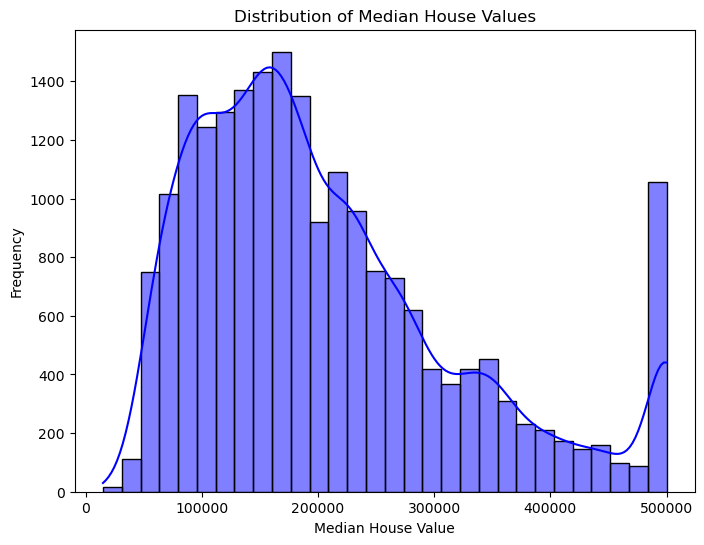

In [280]:
plt.figure(figsize=(8, 6))
sns.histplot(data['median_house_value'], bins=30, kde=True, color='blue')
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

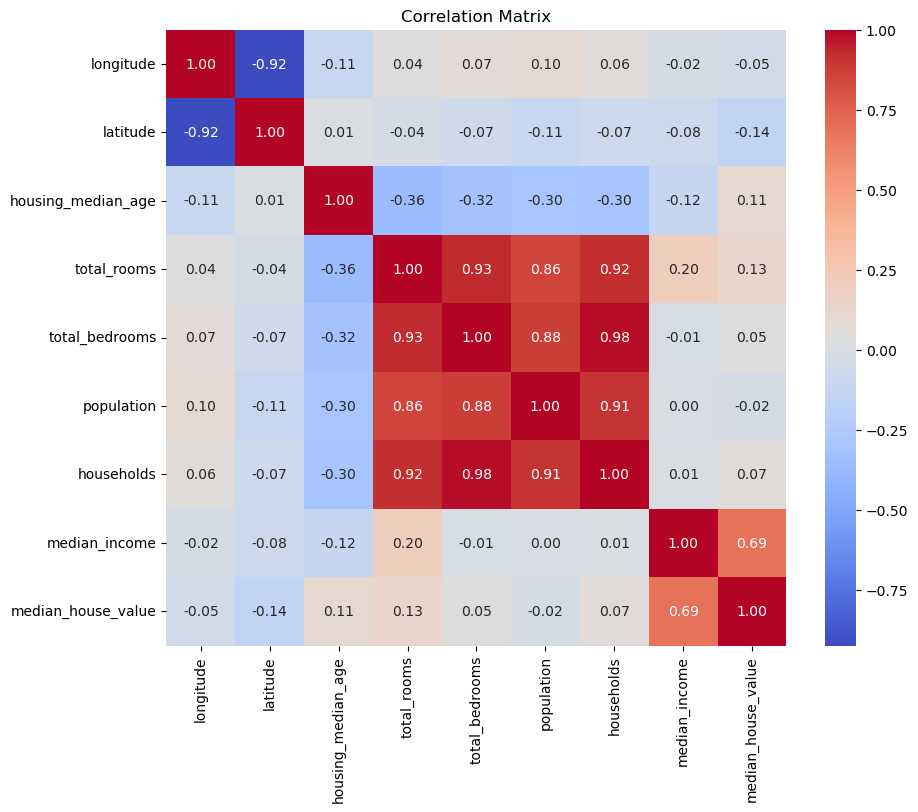

In [281]:
# Select only numerical columns
numeric_data = data.select_dtypes(include=['number'])  

# Check correlation matrix again
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### <b><u>EDA Insights</u></b>
- Missing Values:
    - total_bedrooms has 207 missing values.
    - All other columns are complete.
- Correlation Matrix:
    - median_income has strong positive correlation with median_house_value (0.69).
    - total_rooms, households, and population have weaker correlations.
- Target Variable Distribution:
    - Right-skewed with a cap at $500,001 (potential data capping).

### Handling missing values

In [284]:
#Use SimpleImputer
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='median')
data[['total_bedrooms']]=si.fit_transform(data[['total_bedrooms']])

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [285]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


#### Encode categorical variable

In [288]:
# Categorical Data
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### OneHotEncoding

In [290]:

onehot=OneHotEncoder()
ocean_pro=onehot.fit_transform(data[['ocean_proximity',]]).toarray()

ocean_data=pd.DataFrame(ocean_pro,columns=onehot.get_feature_names_out(['ocean_proximity']))


In [291]:
data=pd.concat([data.drop('ocean_proximity',axis=1),ocean_data],axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0


# <u>Linear Regression Model</u>

#### Select feature for Simple Linear Regression (using 'median_income') because of strong correlation with target variable 

In [294]:
# Define Features and Target
X = data[['median_income']]
y = data['median_house_value']

In [295]:
#  Split data into training and testing sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [296]:
# creates an instance of the Linear Regression
simple_model = LinearRegression()

In [297]:
# Train the model 
simple_model.fit(X_train, y_train)  

LinearRegression()

In [298]:
# predict the model
y_pred = simple_model.predict(X_test)

In [299]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [300]:
# Print metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 7091157771.76555
RMSE: 84209.01241414454
R-squared: 0.45885918903846656


Text(0, 0.5, 'Predicted Y')

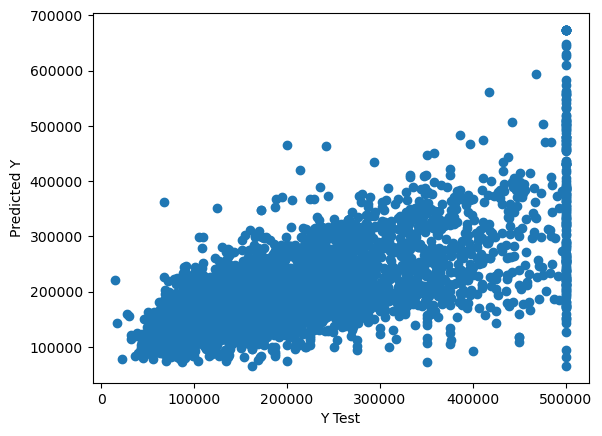

In [301]:
#Create a scatterplot of the real test values versus the predicted values. 
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

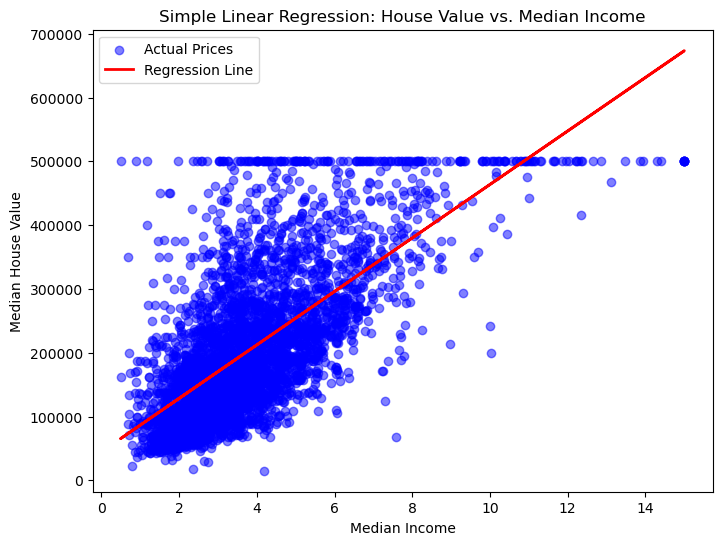

In [302]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression: House Value vs. Median Income")
plt.legend()
plt.show()


#  <u>Multiple Linear Regression</u>

In [304]:
# Define Features (X) and Target (y)
X1 = data.drop(columns=['median_house_value'])  # Independent variables
y1 = data['median_house_value']  # Target variable

In [305]:
# Split Data (80% Train, 20% Test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [306]:
# Scale Numeric Features (Standardization)
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)


In [307]:
# Train the Multiple Linear Regression Model
multi_model = LinearRegression()
multi_model.fit(X1_train, y1_train)


LinearRegression()

In [308]:
y_pred = multi_model.predict(X1_test)

In [309]:
# Evaluate Model Performance
mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

In [310]:
# Display Model Performance
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

Mean Squared Error: 4908476721.16
Root Mean Squared Error: 70060.52
R-Squared Score: 0.63


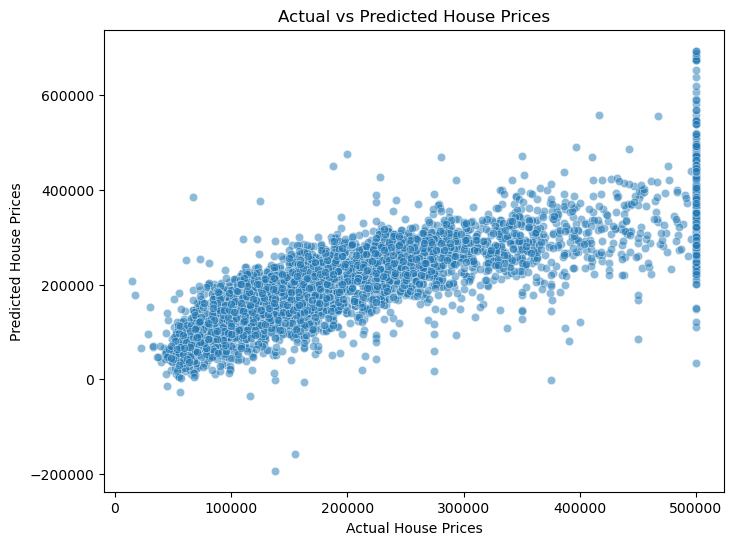

In [311]:
# Visualize Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

## Conclusion
### Multiple Linear Regression model has higher accuracy as compared to Linear Regression

.

# Part B: Customer Churn Prediction

1. Overview
 Customer churn, or customer attrition, refers to when a customer ceases their relationship with a company or service provider. In today's    highly competitive business environment,retaining customers is a critical factor for long-term success. Predicting customer churn can
 help organizations take proactive steps to retain customers, thus minimizing revenue loss.This project aims to build a machine learning      model that can predict whether a customer will churn based on their demographic, account, and service-related data.

 2. Problem Statement
 The goal of this project is to develop a classification model that predicts whether a customer will churn. Using demographic data (such as   gender, senior citizen status, and tenure), along with information about the services they use (such as internet service, phone service,
 and online security), we will attempt to build a model that helps the company identify customers who are at a high risk of churning.
 By predicting customer churn, the company can proactively design retention strategies to keep these customers, thereby improving customer   satisfaction and reducing financial loss.

 4. Dataset Information
 Dataset:https: //docs.google.com/spreadsheets/d/1J2aMbLrRnk8g0Y5TSbz-en_7UxlI7xh0cLIZnIy4aew/edit?usp=sharing
 Data_file : Customer_Churn_Data
 The information related to variables given can be found in the Data Information.pdf.

 5. Deliverables
 ● Adata exploration and preprocessing notebook or report that analyzes the dataset,handles missing values, and prepares the data for  modeling.
 ● Amachinelearning model capable of predicting customer churn.
 ● An evaluation of model performance using appropriate metrics (such as accuracy, precision, recall, F1 score, etc.).
 ● A final report explaining the insights gained from the model and the business implications of customer churn prediction.

 6. Success Criteria
 The success of the project will be determined by the following:
 ● Proper interpretation of the model’s output, providing actionable insights to reduce customer churn.
 ● Get thepredictions for the new data.

 7. Guidelines
 ● Makesureto split your data into training and testing sets to avoid overfitting.
 ● Tunethe hyperparameters of your models to improve performance.
 ● Report all the steps taken in the data preprocessing, modeling, and evaluation phases.
 ● Provide a final model that balances accuracy with interpretability.

8. Tools Required
 ● Python (with libraries such as pandas, scikit-learn, matplotlib, seaborn, etc.)
 ● Jupyter Notebook or any IDE suitable for running Python code.

In [316]:
df = pd.read_csv(r"Data_file - Customer Churn Prediction.csv")

In [317]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [319]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [320]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

In [321]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoder for future use

In [322]:
# Define features (X) and target (y)
y = df['Churn']  # Assuming 'Churn' is the target variable
X = df.drop(columns=['Churn'])


In [323]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [325]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [326]:
# Make predictions
y_pred = model.predict(X_test)

In [327]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [328]:
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance:
Accuracy: 0.7984
Precision: 0.6584
Recall: 0.4960
F1 Score: 0.5657

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



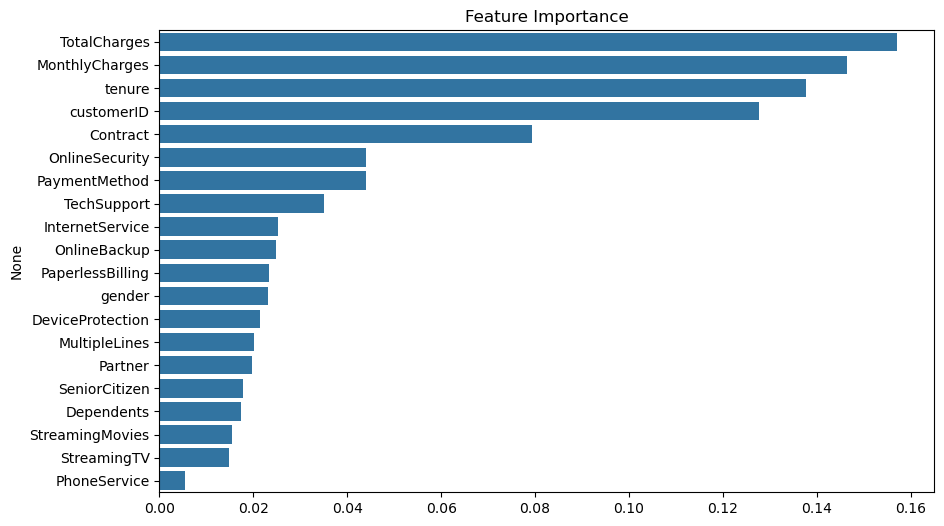

In [329]:
# Feature Importance Visualization
feature_importance = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance")
plt.show()

In [330]:
# Predict on new data (assuming same format as dataset without 'Churn' column)
def predict_new_data(new_data):
    new_data = pd.DataFrame(new_data, columns=X.columns)
    new_data = scaler.transform(new_data)  # Apply same scaling
    predictions = model.predict(new_data)
    return predictions

In [331]:
# Example usage:
new_data_sample = X_test[:5]  # Take some test data
predictions = predict_new_data(new_data_sample)
print("\nPredictions for new data sample:", predictions)


Predictions for new data sample: [1 1 0 1 0]


# Part C : Early Disease Detection

 1. Overview
 Cardiovascular diseases (CVDs), including heart disease, are the leading cause of death
 worldwide. Early detection of heart disease is critical for preventing serious health outcomes
 and improving the quality of life for patients. With the increasing availability of medical data,
 machine learning models can be used to predict whether a patient is likely to develop heart
 disease based on certain health indicators.
 In this project, you will build a classification model to predict whether an individual is likely to
 have heart disease or not. The dataset provided includes various health and demographic
 factors such as age, blood pressure, cholesterol levels, and lifestyle habits (e.g., smoking
 and alcohol consumption). The goal is to train a model to identify which individuals have
 heart disease based on these features.

 2. Problem Statement
 You are provided with a dataset that contains health-related information about individuals.
 Your task is to develop a machine learning model that can predict the presence of heart
 disease based on the provided features. The target variable in the dataset is "disease,"
 which indicates whether a person has heart disease (1) or not (0).
 You need to perform the following tasks:
 Data Exploration and Preprocessing: Understand the dataset, handle missing values,
 perform feature engineering if necessary, and prepare the data for model training.
 Model Development: Train a classification model to predict the presence of heart disease
 using the features provided in the dataset.
 Model Evaluation: Evaluate the model’s performance using appropriate classification metrics
 such as accuracy, precision, recall, and F1-score. Identify the best-performing model based
 on these metrics.
 Insights and Reporting: Analyze the results and provide insights into which factors are the
 most significant predictors of heart disease.

 3. Dataset Information
 Dataset: intershala Projects/Data_file - Early Disease Detection.csv
 The information related to variables given can be found in the Data Information.pdf.

 4. Deliverables
 Exploratory Data Analysis (EDA): Analyze the dataset to understand the distribution of the
 variables, check for missing data, and identify any relationships or patterns between the
 features and the target variable (disease).
 Data Preprocessing: Handle missing or erroneous values, normalize/standardize data if
 necessary, and perform feature engineering if required.
 Model Development: Train various classification models (e.g., Logistic Regression, Decision
 Trees, SVM, etc.) and compare their performance.
 Mode Evaluation: l Evaluate your models using performance metrics such as:
 ● Accuracy
 ● Precision
 ● Recall
 ● F1-Score
 Insights and Conclusion: Based on your model and analysis, provide insights into the
 factors that are most predictive of heart disease and make recommendations on how to
 improve heart disease prediction models.

5. Success Criteria
 A well-documented Jupyter notebook or code file showcasing the entire workflow from data
 exploration to model evaluation.
 Insights derived from the data and model results that provide a better understanding of the
 risk factors associated with heart disease.

 7. Guidelines
 Make sure to split your data into training and testing sets to avoid overfitting.
 Tune the hyperparameters of your models to improve performance.
 Report all the steps taken in the data preprocessing, modeling, and evaluation phases.
 Provide a final model that balances accuracy with interpretability.

  8.Tools Required
  Python (with libraries such as pandas, scikit-learn, matplotlib, seaborn, etc.)
  Jupyter Notebook or any IDE suitable for running Python code.

#### Load the dataset

In [335]:
df = pd.read_csv(r"Data_file - Early Disease Detection.csv")


#### Display the first few rows of the dataset

In [337]:
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


#### Display information about dataset columns and types

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


#### Display summary statistics of the dataset

In [341]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


#### Check for missing values

In [343]:
df.isnull().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

#### Visualize the distribution of the target variable (disease)

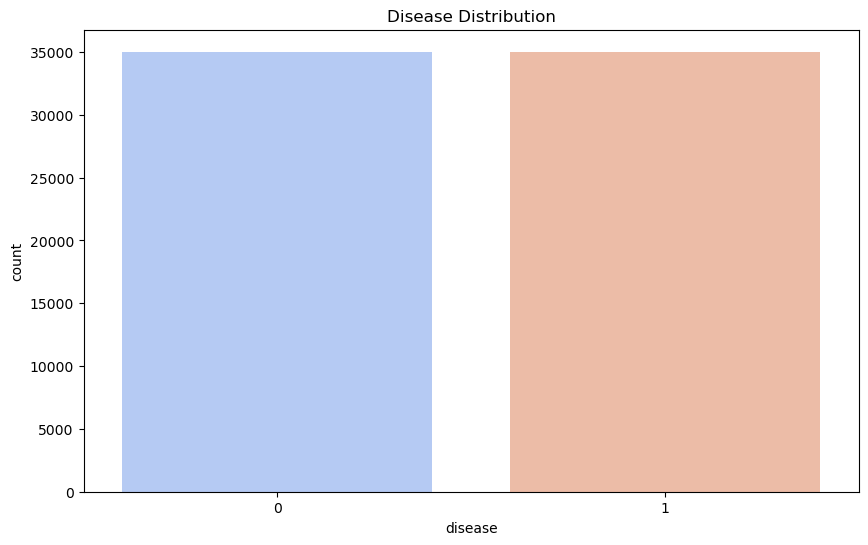

In [345]:
plt.figure(figsize=(10, 6))
sns.countplot(x='disease', data=df, palette='coolwarm')
plt.title("Disease Distribution")
plt.show()


#### Drop irrelevant columns that do not contribute to prediction

In [347]:
df.drop(columns=['id', 'date', 'country', 'occupation'], inplace=True)

#### Encode categorical variable 'gender' as numerical values

In [349]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

#### Handle missing values by filling them with the median of respective columns

In [351]:
imputer = SimpleImputer(strategy='median')
df.iloc[:, :] = imputer.fit_transform(df)

#### Define feature variables (X) and target variable (y)

In [353]:
X = df.drop(columns=['disease'])
y = df['disease']

#### Split the dataset into training (80%) and testing (20%) sets

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardize feature variables to improve model performance

In [357]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Initialize and train Logistic Regression model

In [359]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


#### Evaluate Logistic Regression model

In [361]:
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("-" * 50)


Logistic Regression Model
Accuracy: 0.7235714285714285
Precision: 0.7456990928995934
Recall: 0.6799771819737592
F1 Score: 0.7113232880799641
Confusion Matrix:
 [[5362 1626]
 [2244 4768]]
--------------------------------------------------


#### Initialize and train Decision Tree model

In [363]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)


#### Evaluate Decision Tree model

In [365]:
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("-" * 50)

Decision Tree Model
Accuracy: 0.6285
Precision: 0.6273021228736116
Recall: 0.6363377067883628
F1 Score: 0.631787610619469
Confusion Matrix:
 [[4337 2651]
 [2550 4462]]
--------------------------------------------------


#### Initialize and train Support Vector Machine (SVM) model

In [367]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#### Evaluate SVM model

In [369]:
print("Support Vector Machine Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("-" * 50)


Support Vector Machine Model
Accuracy: 0.7319285714285715
Precision: 0.7473061162543634
Recall: 0.7022247575584712
F1 Score: 0.724064407028895
Confusion Matrix:
 [[5323 1665]
 [2088 4924]]
--------------------------------------------------


### Conclusion:
#### The SVM model is the best choice because it outperforms the others in accuracy, precision, recall, and F1 score. It maintains a good balance between identifying true positives while minimizing false positives and false negatives.